****Import modules****

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

****Import MNIST dataset****

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

****Examine data****

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train.dtype

dtype('uint8')

In [7]:
x_train[0,:,:]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

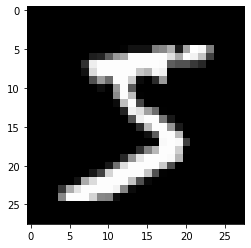

In [8]:
plt.imshow(x_train[0, :, :], cmap='gray')

In [9]:
y_train.shape

(60000,)

In [10]:
y_train.dtype

dtype('uint8')

In [11]:
y_train[0]

5

****Normalize data to [0, 1] interval****

In [12]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [13]:
x_train.dtype

dtype('float64')

In [14]:
x_test.dtype

dtype('float64')

In [15]:
x_train[0, :, :]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

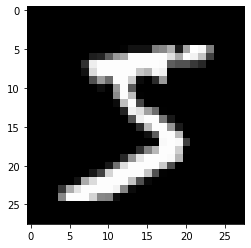

In [16]:
plt.imshow(x_train[0, :, :], cmap='gray')

****One-hot encode labels****

In [17]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)

In [18]:
y_train.shape

(60000, 10)

In [19]:
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [20]:
y_test.shape

(10000, 10)

****Set up image classification model - Simple CNN****

In [58]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)),
                            tf.keras.layers.MaxPooling2D((2,2)),
                            tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                            tf.keras.layers.MaxPooling2D((2, 2)),
                            tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                            tf.keras.layers.Dropout(0.2),
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(64, activation='relu'),
                            tf.keras.layers.Dense(10, activation='softmax')])

In [59]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
dropout (Dropout)            (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 576)              

In [60]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])

In [61]:
history = model.fit(x_train.reshape((60000, 28, 28, 1)), y_train, epochs=5, batch_size=100)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 75us/sample - loss: 0.2210 - accuracy: 0.9302
Epoch 2/5
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0593 - accuracy: 0.9822
Epoch 3/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0423 - accuracy: 0.9868
Epoch 4/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0342 - accuracy: 0.9898
Epoch 5/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0277 - accuracy: 0.9913


In [62]:
evaluation_results = model.evaluate(x_test.reshape((10000, 28, 28, 1)), y_test)

10000/10000 [==============================] - 1s 69us/sample - loss: 0.0273 - accuracy: 0.9912


In [63]:
print('Accuracy: {} %'.format(round(evaluation_results[1] * 100.0, 3)))

Accuracy: 99.12 %


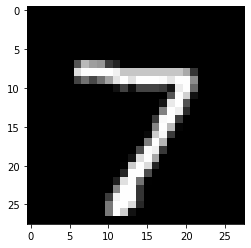

In [55]:
plt.imshow(x_test[0], cmap='gray')

In [56]:
model.predict_classes(x_test[0].reshape((1, 28, 28, 1)))[0]

7